In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('labeled_and_scored_comments.csv')

In [2]:
df.head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0.450459,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0.667964,0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0.068434,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0.151724,0,0,0,0,0,0


In [3]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [4]:
from googleapiclient.discovery import build
import json

def get_toxicity_score(comment):
    
  API_KEY = 
    
  client = build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
  )

  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

In [5]:
df['score'].value_counts()

0.310894    476
0.515460    163
0.534903    144
0.860626    141
0.695427    141
           ... 
0.128345      1
0.067656      1
0.833239      1
0.254922      1
0.341041      1
Name: score, Length: 39108, dtype: int64

In [6]:
df[df['score']>= 0.86]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
27,0016b94c8b20ffa6,I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...,0.902320,0,0,0,0,0,0
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
59,03c1c7a2649a7d87,":::Jeez Ed, you seem like a fucking shitty dou...",0.992469,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
41230,950289915676e6d7,you stink shoo woo woo,0.860626,1,0,0,0,1,0
41237,94f8578325d529ad,"LMAO WHAT WEAK THREATS, I HAVENT BEEN BANNED Y...",0.945277,1,1,1,0,1,0
41238,94f8302c2e339bae,"THIS IS AWFUL, JUST AWFUL!!! ALL GERMANS ARE M...",0.878531,1,0,1,0,1,1
41299,94a5024323152cd1,"==Why does it bother you, fuckface?89.123.100....",0.989706,1,0,1,0,1,0


In [7]:
df[df['severe_toxic']== 1]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
330,1a3ffaa9e319104c,==Yo mama== \n This is yo mama and I know that...,0.959383,1,1,1,0,1,0
332,1a44cad92a0c1c96,==Son of a bitch== \n\n Hey you fucking neo-Na...,0.992705,1,1,1,0,1,1
338,1a4c6302cea3ffe2,Dick Cheney will fucking kill all of those god...,0.951699,1,1,1,1,1,1
430,20cdeb8ee999a478,== You know what smart arrse........phuck a bi...,0.928721,1,1,1,0,1,0
447,2412ef2ce6f87a73,"SSJ, the only way that fucking pitiful excuse ...",0.977829,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
41017,9622c82f97eb26cd,She is a Motherfucker \n\nI will block you Mot...,0.967966,1,1,1,1,1,1
41053,95eda78799f2f83c,i forgot to sign \nReed210 \n\nPS Does your di...,0.975341,1,1,1,0,1,0
41071,95ca65d4cd31d3dd,HOPE YOUR HEAD GETS CUT OFF AND SOMEONE WIPES ...,0.980211,1,1,1,1,1,0
41181,95390a4e0cd90ad3,"Fuck You Asshole \n\nFuck You, you cum-guzzlin...",0.991540,1,1,1,0,1,0


In [8]:
severe_toxic = df[df['severe_toxic']== 1]

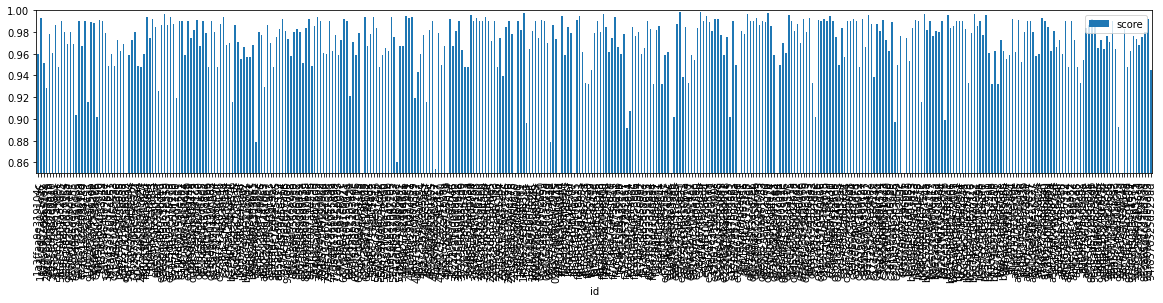

In [19]:
import matplotlib.pyplot as plt
severe_toxic.plot.bar(x='id', y='score')
plt.ylim(0.85, 1.00)
plt.rcParams["figure.figsize"] = (30,300)

From here we can see that almost all but a few are over 0.85. So we can tell that those greater than 0.85 have the "severe_toxic" sub-tag

In [10]:
df[df['score']>= 0.993]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1695,918b665e3026cbef,FUCK YOU ALL! FUCK YOU ALL! FUCK YOU ALL! FUCK...,0.994959,1,0,1,0,1,0
5163,8922ff8e65efbe38,FUCK YOU BITCH FUCK YOU BITCH FUCK YOU BITCH F...,0.994465,1,0,1,0,1,0
6135,f5bd637baaa1a0ed,asshole. \n\nFuck off.,0.993572,1,1,1,0,1,0
6964,e88321c89a619419,Stupid fucking bitch rot in hell piece of shit,0.996872,1,1,1,0,1,0
7106,e6315da10c275d79,FUCK OFF YOU CRYBABY SHIT OF A MAN,0.994054,1,1,1,0,1,0
7304,e297dd3d3e70c9e9,Fuck u bitch \n\nFuck u Bitch,0.993482,1,0,1,0,1,1
9303,c2c8f11c4893bb4a,"FUCK YOU KID, Get the Fuck out of my country.",0.993586,1,1,1,0,1,0
13513,7e40d2ad4ef45b62,FUCK YOU! FUCK YOU! FUCK YOU! FUCK YOU! \nFUCK...,0.994197,1,1,1,0,0,0
15134,62e736877c28bf05,fuck you \n\nWanker,0.993411,1,1,1,0,1,0
15219,613f3490153d346e,Fuck you \n\nYou're a stupid bitch 142.162.85.154,0.994489,1,0,1,0,1,0


In [11]:
toxic_words = df[df['score']>= 0.993]

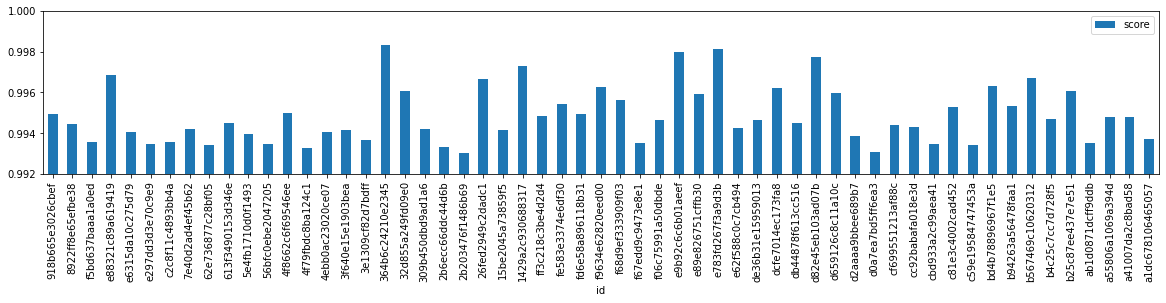

In [21]:
import matplotlib.pyplot as plt
toxic_words.plot.bar(x='id', y='score')
plt.ylim(0.992, 1.00)
plt.rcParams["figure.figsize"] = (20,3)

I will start testing the API from here

In [13]:
import time
comment_list = ['hello pig', 'rip', 'suck straw']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

hello pig 0.794439
rip 0.24126673
suck straw 0.8491136


In [22]:
comment_list = ['woman are better than man', 'i hate man', 'man are suck']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

woman are better than man 0.48809174
i hate man 0.7682065
man are suck 0.93232936


In [23]:
comment_list = ['Balderdash!', 'knave', 'cozen']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

Balderdash! 0.10059879
knave 0.074935615
cozen 0.044748597


From here we can see that the API will ignore Shakespeare's time expletives.as well as it will not recognize some swear word alternatives. As well as for some normal words misjudged.

In [16]:
df[df['score']>= 0.73]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
27,0016b94c8b20ffa6,I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...,0.902320,0,0,0,0,0,0
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
59,03c1c7a2649a7d87,":::Jeez Ed, you seem like a fucking shitty dou...",0.992469,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
41290,94aca26c29f7a0bd,"Hypocritical, double standard admins, as typic...",0.833779,0,0,0,0,1,0
41297,94a6beeb87ab68c0,"Damn, those are some rancid sources.",0.821990,1,0,1,0,0,0
41299,94a5024323152cd1,"==Why does it bother you, fuckface?89.123.100....",0.989706,1,0,1,0,1,0
41332,9481cd7393b583c9,"RE: \n\nIt's a fucking album cover, how the fu...",0.932649,1,0,1,0,0,0


In [17]:
df['comment_text'][41333]

'Lesbian Teenager \nHow about the fact she was a lesbian in her teenaged years?\nThats important isnt it?\n\n Ignorant fundy \n\nHow about saying the fact shes an ignorant fundy, thinks the world is 6000 years old and pretends evolution is not real?'

I don't think it's abusive, it's an API misjudgment

I think the model fails to recognize Old English (Shakespearean period) (Knave 0.074) as well as when using some uncommon swear words/expletive substitutes (Balderdash! 0.10).

The model it has some malice for some specific groups, for example, at line 41333, I did not think it had any poison, but the model gave it a high score of 0.7976. When I repeatedly looked at the sentence I didn't find any toxicity, only one word: Lesbian Teenager, and when I tested certain words it gave me some wrong scores. I think it's caused by the model being too sensitive, like suck straws. The system gave a high score of 0.84.

The reason for my result I think is very simple, when writing this model, the person writing the code added their own ideas to the code when writing the code, which led to some bias in the code
